# 14-day cumulative number of COVID-19 cases per 100 000

At the end of the page, we provide a detailed description of how the numbers are calculated.

### Compute data

In [1]:
import datetime as dt
import pandas as pd
pd.set_option("max_rows", None)
from oscovida import get_incidence_rates_countries

## Table for all countries

In [2]:
cases_incidence, deaths_incidence = get_incidence_rates_countries()

Downloaded data: last data point 9/22/21 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Downloaded data: last data point 9/22/21 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv


In [3]:
cases_incidence

,14-day-sum,population,14-day-incidence-rate
Country,,,
Afghanistan,1021,38928341,2.6
Albania,11778,2877800,409.3
Algeria,3160,43851043,7.2
Andorra,83,77265,107.4
Angola,4038,32866268,12.3
Antigua and Barbuda,651,97928,664.8
Argentina,29933,45195777,66.2
Armenia,8299,2963234,280.1
Australia,24136,25459700,94.8


## Table sorted by 14-day-incidence

In [4]:
cases_incidence.sort_values(by=['14-day-incidence-rate'], ascending=False)

,14-day-sum,population,14-day-incidence-rate
Country,,,
Grenada,2608,112519,2317.8
Dominica,959,71991,1332.1
Mongolia,43598,3278292,1329.9
Montenegro,8292,628062,1320.3
Israel,107746,8655541,1244.8
Suriname,6875,586634,1171.9
Serbia,92015,8737370,1053.1
Cuba,112359,11326616,992.0
Seychelles,899,98340,914.2


## Tutorial: Detailed calculation for one country

In [5]:
from oscovida import fetch_cases, get_population
import datetime

In [6]:
period = 14 # Days we compute the incidence rate over

In [7]:
cases = fetch_cases() # Get a DataFrame where each row is the country, and columns cumulative case numbers
cases = cases.groupby(cases.index).sum() # Merge the rows for different regions as we want the numbers for an entire country

In [8]:
cases_germany = cases.loc['Germany'][2:] # First 2 entries are lat/lon so we only take the subsequent ones
cases_germany.tail()

9/18/21    4144165.0
9/19/21    4149832.0
9/20/21    4155160.0
9/21/21    4162437.0
9/22/21    4173357.0
Name: Germany, dtype: float64

In [9]:
yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
x_days_ago = yesterday - datetime.timedelta(days=period)

In [10]:
period_mask = (
    (yesterday > pd.to_datetime(cases_germany.index)) &
    (pd.to_datetime(cases_germany.index) > x_days_ago)
) # Mask for dates between today and x days ago

In [11]:
cases_in_period_per_day_germany = cases_germany[period_mask].diff() # Apply the period mask and get the diff to get the daily new cases
cases_in_period_per_day_germany

9/9/21         NaN
9/10/21     3148.0
9/11/21     8537.0
9/12/21     6945.0
9/13/21     6287.0
9/14/21     8840.0
9/15/21    13090.0
9/16/21    11816.0
9/17/21     9904.0
9/18/21     7103.0
9/19/21     5667.0
9/20/21     5328.0
9/21/21     7277.0
9/22/21    10920.0
Name: Germany, dtype: float64

<AxesSubplot:>

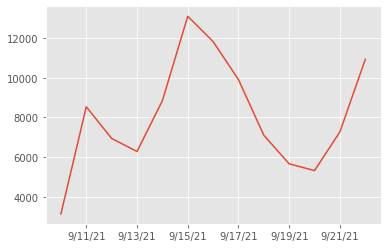

In [12]:
cases_in_period_per_day_germany.plot() # We can easily look at new cases per day

In [13]:
population = get_population().population

In [14]:
population_germany = population.loc['Germany'] # Get the population of Germany
population_germany

83783945.0

In [15]:
incidence_rate_germany = cases_in_period_per_day_germany.sum() / population_germany * 100_000
incidence_rate_germany # By convention this is total cases over period / population * 100_000

125.1576301402375